In [1]:
import os
os.environ["USE_PYGEOS"] = "0"  # suppress geopandas warning

In [13]:
import matplotlib.pyplot as plt
import osmnx as ox

# Download OSM network data and geometries

In [3]:
place = "Delft, NL"
crs_epsg = 28992  # RD

In [4]:
# retrieve nodes and edges
G = ox.graph_from_place(place, network_type="walk")

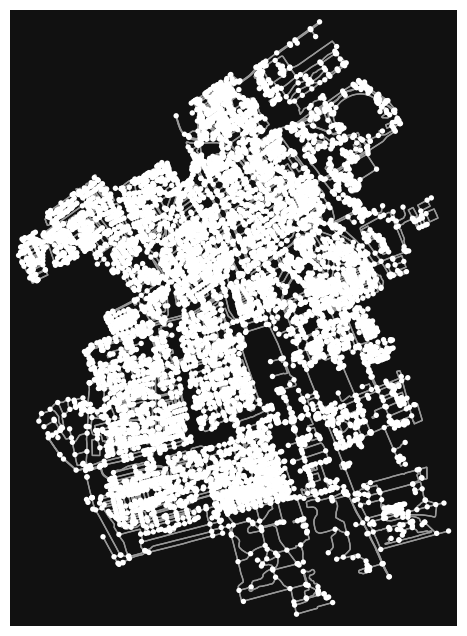

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
# visualize graph
ox.plot_graph(G)

In [6]:
# extract nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

In [7]:
# retrieve parks
tags = {'leisure': 'park', 'landuse': 'grass'}
parks = ox.geometries_from_place(place, tags)

In [8]:
# retrieve buildings
tags = {'building': True}
buildings = ox.geometries_from_place(place, tags)

In [9]:
# clean nodes
nodes = nodes[["geometry"]]
nodes = nodes.to_crs(crs_epsg)
nodes["x"] = nodes.geometry.x
nodes["y"] = nodes.geometry.y

In [10]:
# clean edges
edges = edges.reset_index()
edges = edges[["u", "v", "key", "length", "geometry"]]
edges = edges.to_crs(crs_epsg)

In [11]:
# clean parks
parks = parks.reset_index("element_type")
parks = parks[parks["element_type"] == "way"]
parks = parks[["geometry"]]
parks = parks.to_crs(crs_epsg)

In [12]:
# clean buildings
buildings = buildings.reset_index("element_type")
buildings = buildings[buildings["element_type"] == "way"]
buildings = buildings[["geometry"]]
buildings = buildings.to_crs(crs_epsg)

(81385.82533955466, 89447.30425001372, 440793.1380114911, 450266.8347149982)

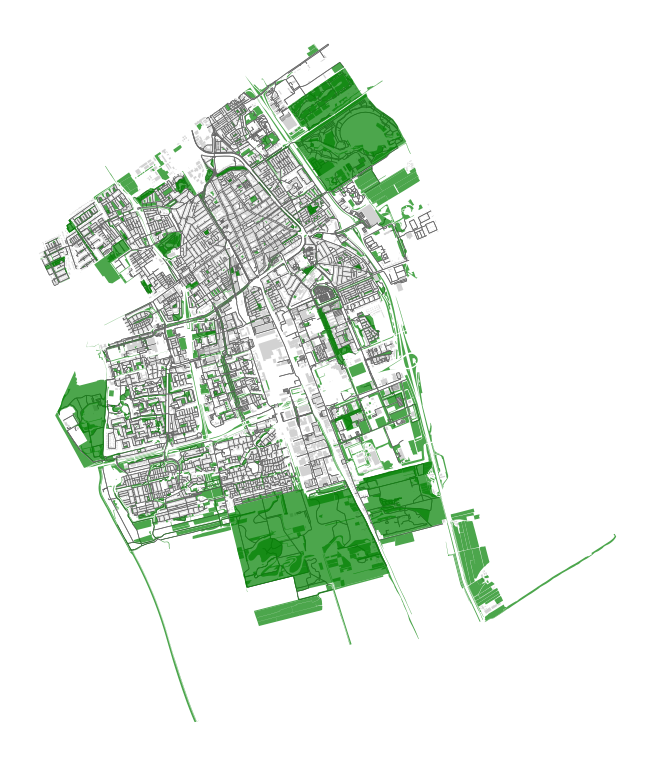

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot street edges
edges.plot(ax=ax, linewidth=0.5, edgecolor='dimgray', zorder=1)

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7, zorder=2)

# Plot parks
parks.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)
plt.tight_layout()
plt.axis('off')

In [15]:
# write output
nodes.to_file("data/nodes.shp")
edges.to_file("data/edges.shp")
parks.to_file("data/parks.shp")
buildings.to_file("data/buildings.shp")